è uno strumento che mi consente di fare analisi esplorativa su dati di cui non so nulla
lavoriamo su variabili di tipo quantitativo

pca è un metodo di riduzione di dimensionalità

prima iniziare pca devo chiedermi se i dati che sto indagando hanno senso riportati in uno spazio vettoriale, anche perchè una volta terminata l'analisi devo riportarli nelle loro dimensioni originali

consideriamo la retta passante per l'origine perchè queste generano sottospazi vettoriali


a ogni step individuo un nuovo riferimento cartesiano sui dati, un nuovo punto di osservazione

l'unico indicatore sui dati resta la varianza (ho messo tutto con media zero per traslare i dati)


nel caso della pca la standardizzazione potrebbe togliere delle informazioni


è utile anche interrogarsi su cme sono stati raccolti i dati, chiedere all'esperto del dominio: è importante calarsi nel tipo di dato che si sta andando ad analizzarsi, è importante avere una idea dei dati in modo da interfacciarsi al meglio con gli esperti di dominio e arrivare a un vocabolario comune
(ad es. esempio su dati geochimici dove dopo aver fatto la matrice di correlazione si analizzano le pc e si individuano degli indici grazie alla conoscenza del dominio)

sarebbe meglio eliminare i dati mancanti dall'analisi prima di iniziare la pca

*ATTENZIONE* non esiste relazione di distanza tra variabili qualitative, e quindi bisogna capire se i dati che si hanno sono etichette numeriche (facile se sono già etichette letterali)

In [2]:
## dataset iris
data(iris)
head(iris,150)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species  
1   5.1          3.5         1.4          0.2         setosa   
2   4.9          3.0         1.4          0.2         setosa   
3   4.7          3.2         1.3          0.2         setosa   
4   4.6          3.1         1.5          0.2         setosa   
5   5.0          3.6         1.4          0.2         setosa   
6   5.4          3.9         1.7          0.4         setosa   
7   4.6          3.4         1.4          0.3         setosa   
8   5.0          3.4         1.5          0.2         setosa   
9   4.4          2.9         1.4          0.2         setosa   
10  4.9          3.1         1.5          0.1         setosa   
11  5.4          3.7         1.5          0.2         setosa   
12  4.8          3.4         1.6          0.2         setosa   
13  4.8          3.0         1.4          0.1         setosa   
14  4.3          3.0         1.1          0.1         setosa   
15  5.8          4.0         1.2          0.2         setosa   
16  5.7          4.4         1.5          0.4         setosa   
17  5.4          3.9         1.3          0.4         setosa   
18  5.1          3.5         1.4          0.3         setosa   
19  5.7          3.8         1.7          0.3         setosa   
20  5.1          3.8         1.5          0.3         setosa   
21  5.4          3.4         1.7          0.2         setosa   
22  5.1          3.7         1.5          0.4         setosa   
23  4.6          3.6         1.0          0.2         setosa   
24  5.1          3.3         1.7          0.5         setosa   
25  4.8          3.4         1.9          0.2         setosa   
26  5.0          3.0         1.6          0.2         setosa   
27  5.0          3.4         1.6          0.4         setosa   
28  5.2          3.5         1.5          0.2         setosa   
29  5.2          3.4         1.4          0.2         setosa   
30  4.7          3.2         1.6          0.2         setosa   
... ...          ...         ...          ...         ...      
121 6.9          3.2         5.7          2.3         virginica
122 5.6          2.8         4.9          2.0         virginica
123 7.7          2.8         6.7          2.0         virginica
124 6.3          2.7         4.9          1.8         virginica
125 6.7          3.3         5.7          2.1         virginica
126 7.2          3.2         6.0          1.8         virginica
127 6.2          2.8         4.8          1.8         virginica
128 6.1          3.0         4.9          1.8         virginica
129 6.4          2.8         5.6          2.1         virginica
130 7.2          3.0         5.8          1.6         virginica
131 7.4          2.8         6.1          1.9         virginica
132 7.9          3.8         6.4          2.0         virginica
133 6.4          2.8         5.6          2.2         virginica
134 6.3          2.8         5.1          1.5         virginica
135 6.1          2.6         5.6          1.4         virginica
136 7.7          3.0         6.1          2.3         virginica
137 6.3          3.4         5.6          2.4         virginica
138 6.4          3.1         5.5          1.8         virginica
139 6.0          3.0         4.8          1.8         virginica
140 6.9          3.1         5.4          2.1         virginica
141 6.7          3.1         5.6          2.4         virginica
142 6.9          3.1         5.1          2.3         virginica
143 5.8          2.7         5.1          1.9         virginica
144 6.8          3.2         5.9          2.3         virginica
145 6.7          3.3         5.7          2.5         virginica
146 6.7          3.0         5.2          2.3         virginica
147 6.3          2.5         5.0          1.9         virginica
148 6.5          3.0         5.2          2.0         virginica
149 6.2          3.4         5.4          2.3         virginica
150 5.9          3.0         5.1          1.8         virginica

In [4]:
iris_species = iris$Species
x <- as.matrix(iris[,1:4])
n <- nrow(x)
d <- ncol(x)
mediaX <- colMeans(x) #vettore delle medie
matmediaX <- matrix(mediaX, nrow = 150, ncol=4, byrow=T) ##matrice delle medie
xc = x - matmediaX #centro il dato sul valore medio
colMeans(xc) #verifico che la matrice xc ha la media a zero

Sepal.Length   Sepal.Width  Petal.Length   Petal.Width 
-3.671137e-16  9.177844e-17 -3.256654e-17 -3.404684e-17

In [5]:
rx <- cor(xc)
rx

Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length  1.0000000   -0.1175698   0.8717538    0.8179411 
Sepal.Width  -0.1175698    1.0000000  -0.4284401   -0.3661259 
Petal.Length  0.8717538   -0.4284401   1.0000000    0.9628654 
Petal.Width   0.8179411   -0.3661259   0.9628654    1.0000000

In [9]:
#devo calcolare autovalore e autovettore (si possono calcolare solo se la matrice è quadrata)
#altrimenti di usano i valori singolari
ad = eigen(rx)$vectors
ad

lamda = eigen(rx)$values
lamda

percvarexp = lamda/d
percvarexp

#percentuale cumulativa della varianza
varcum = cumsum(percvarexp)
varcum #posso vedere che già alla due ho il 95% dell'info, ma in realtà possiamo già ridurre alla monodimensione

[,1]       [,2]        [,3]       [,4]      
[1,]  0.5210659 -0.37741762  0.7195664  0.2612863
[2,] -0.2693474 -0.92329566 -0.2443818 -0.1235096
[3,]  0.5804131 -0.02449161 -0.1421264 -0.8014492
[4,]  0.5648565 -0.06694199 -0.6342727  0.5235971

[1] 2.91849782 0.91403047 0.14675688 0.02071484

[1] 0.729624454 0.228507618 0.036689219 0.005178709

[1] 0.7296245 0.9581321 0.9948213 1.0000000

In [10]:
pcselected <- ad[,1:2]

pcselected

[,1]       [,2]       
[1,]  0.5210659 -0.37741762
[2,] -0.2693474 -0.92329566
[3,]  0.5804131 -0.02449161
[4,]  0.5648565 -0.06694199

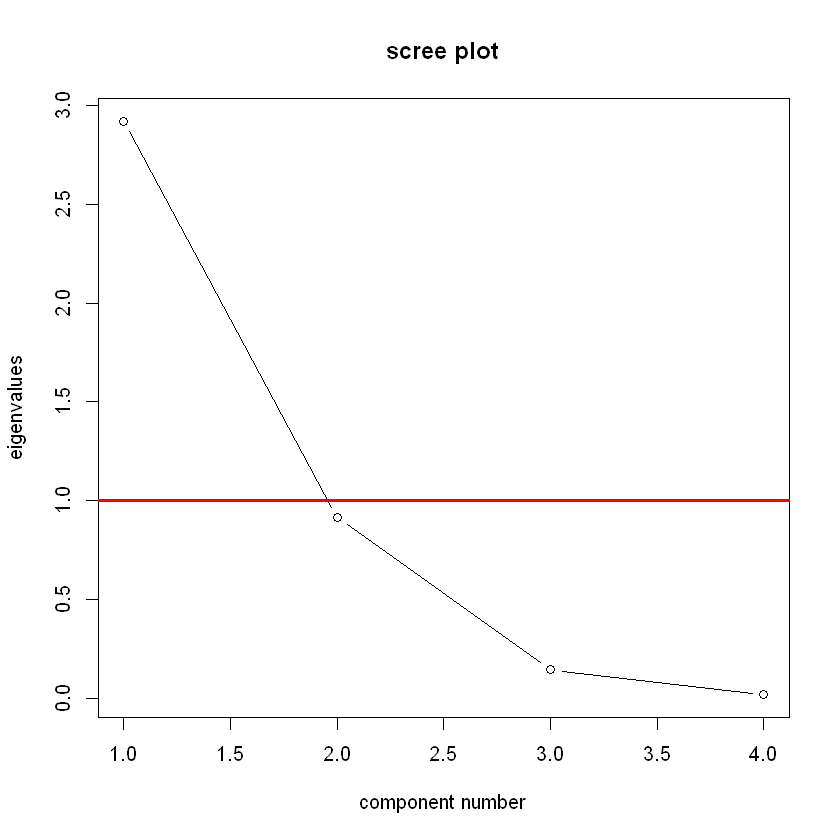

In [12]:
plot(lamda, type="b", main="scree plot", xlab="component number", ylab="eigenvalues")
abline(h=1,lwd=3,col="red") #andamento degli autovalori in funzione della grandezza

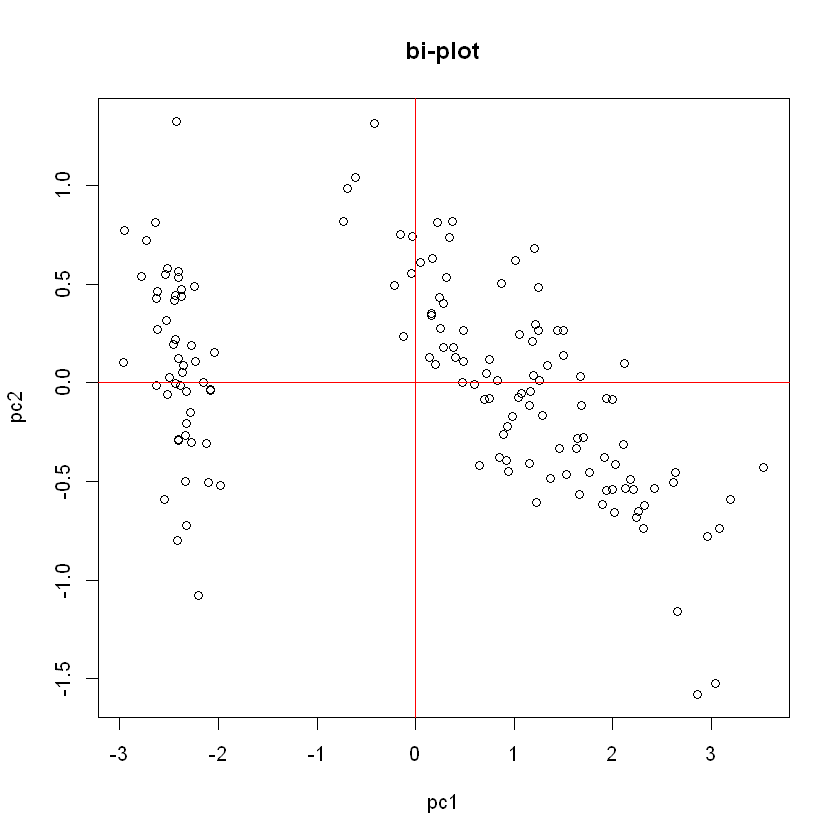

In [13]:
##facciamo l'interpretazione tramite gli scoring
#ricostruisco i punti dopo aver ridotto la dimensione da 4 a due feature
y <- xc%*%ad
plot(y, main="bi-plot", xlab ="pc1", ylab="pc2")
abline(v=0,h=0,col="red")

In [14]:
head(ad)
head(percvarexp)

[,1]       [,2]        [,3]       [,4]      
[1,]  0.5210659 -0.37741762  0.7195664  0.2612863
[2,] -0.2693474 -0.92329566 -0.2443818 -0.1235096
[3,]  0.5804131 -0.02449161 -0.1421264 -0.8014492
[4,]  0.5648565 -0.06694199 -0.6342727  0.5235971

[1] 0.729624454 0.228507618 0.036689219 0.005178709

In [15]:
##or facciamo la stessa cosa ma con due funzioni built in di R
df_pca <- prcomp(xc, scale=TRUE) #do in input la matrice centrata sui dati
summary(df_pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

In [16]:
#checking
head(df_pca$rotation)
head(ad)

eigs <- df_pca$sdev^2 #calcolo il mio lamba

head(eigs)
head(lamda) #controllo che siano uguali


PC1        PC2         PC3        PC4       
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

[,1]       [,2]        [,3]       [,4]      
[1,]  0.5210659 -0.37741762  0.7195664  0.2612863
[2,] -0.2693474 -0.92329566 -0.2443818 -0.1235096
[3,]  0.5804131 -0.02449161 -0.1421264 -0.8014492
[4,]  0.5648565 -0.06694199 -0.6342727  0.5235971

[1] 2.91849782 0.91403047 0.14675688 0.02071484

[1] 2.91849782 0.91403047 0.14675688 0.02071484

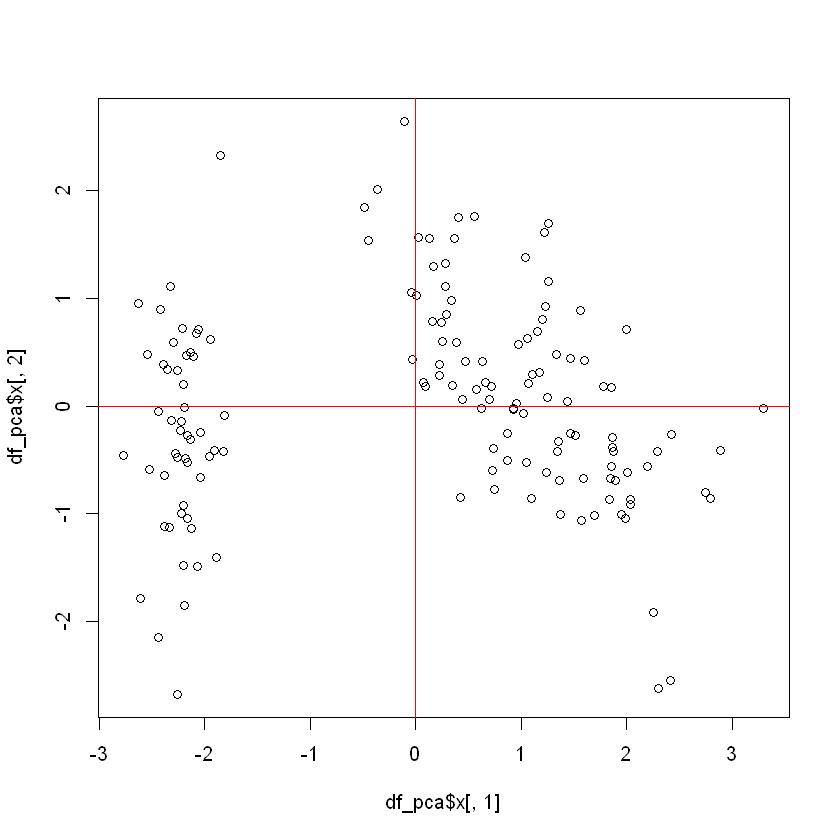

In [18]:
plot(df_pca$x[,1],df_pca$x[,2])
abline(v=0,h=0,col="red")

In [23]:
library(ggplot2)

df_out <- as.data.frame(df_pca$x)
df_out$group <- sapply( strsplit(as.character(row.names(df_out)),"_"), "[[", 1)

p <- ggplot(df_out, aes(x=PC1, y=PC2, color=iris_species))
p <- geom_point()
p

geom_point: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 